# Microsoft Security Incident Prediction

This notebook provides a comprehensive workflow for predicting security incidents using a real-world dataset from Microsoft. The process includes:

1. **Data Acquisition**: Downloading the relevant CSV file containing cybersecurity incident data.
2. **Data Exploration**: Exploring the dataset to gain insights into its structure, identifying patterns and correlations, and assessing the distribution of key features.IncidentGrade
3. **Visualizations**: Creating various plots to visualize trends and relationships in the data, which helps in understanding the underlying patterns that could inform predictive models.
4. **Data Preprocessing**: Cleaning and preparing the dataset for analysis, including handling missing values, encoding categorical variables, and scaling numerical features.

By the end of this notebook, we will have clean, stratified, and reduced datasets ready for model training and evaluation.

Before proceeding with the download, we would like to mention that the original dataset contains two types of files: GUIDE_train and GUIDE_test. These files are large in terms of the number of rows. To carry out this project, we will use only a part of the data due to time complexity when training the models. In particular, we reduce the data to only 10,000 rows from the GUIDE_train file for training, while the GUIDE_test file will remain untouched.

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from kagglehub import dataset_download
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Acquisition

In [3]:
def create_reduced_file(original_file_path, reduced_file_path, target_column, sample_size=10000):
    """
    Creates a reduced file from the original file by applying stratified undersampling.

    :param original_file_path: Path to the original file.
    :param reduced_file_path: Path where the reduced file will be saved.
    :param target_column: Name of the target column for stratification.
    :param sample_size: Size of the reduced dataset.
    """
    df_original = pd.read_csv(original_file_path)
    print(f"The original file has {len(df_original)} rows.")
    
    # Perform stratified undersampling
    df_reduced, _ = train_test_split(
        df_original,
        train_size=sample_size,
        stratify=df_original[target_column],
        random_state=42
    )
    
    df_reduced.to_csv(reduced_file_path, index=False)
    print(f"Reduced file created with {len(df_reduced)} rows, maintaining class proportions.")

In [4]:
# Path Configuration
dataset_folder = os.getcwd()
reduced_file_path = os.path.join(dataset_folder, 'microsoft_Reduced.csv')

if not os.path.exists(reduced_file_path):
    file_path = dataset_download("Microsoft/microsoft-security-incident-prediction")
    original_file_path = os.path.join(file_path, "GUIDE_Train.csv")
    create_reduced_file(original_file_path, reduced_file_path, target_column='IncidentGrade')
else:
    data = pd.read_csv(reduced_file_path)
    print(f"File loaded with {len(data)} rows.")

File loaded with 10000 rows.


## Data Exploration

In [5]:
data.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,764504183844,46,2165,464218,2024-06-06T17:32:50.000Z,217,194,Execution,NaN,TruePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
1,335007450291,358,81220,23843,2024-06-08T19:59:54.000Z,1,1,InitialAccess,T1566.002,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
2,1468878815912,171,337929,433815,2024-06-13T21:39:26.000Z,862,7604,Exfiltration,NaN,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private
3,704374638571,158,278841,1448996,2024-06-05T15:45:39.000Z,3745,22159,Exfiltration,NaN,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,523986014933,295,1723,226867,2024-06-08T23:20:44.000Z,1,1,InitialAccess,T1566.002,FalsePositive,...,NaN,5,66,NaN,NaN,Malicious,242,1445,10630,Private


In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,10000.0,NaN,NaN,NaN,848020679316.863647,490333818947.101562,184.0,420906798236.0,841813591828.0,1271310320486.5,1709396988886.0
OrgId,10000.0,NaN,NaN,NaN,174.0017,367.429485,0.0,8.0,43.0,172.0,5951.0
IncidentId,10000.0,NaN,NaN,NaN,68409.7066,117319.419739,3.0,421.0,9179.5,82105.75,597777.0
AlertId,10000.0,NaN,NaN,NaN,408951.692,454056.606146,0.0,25326.25,227927.0,671573.0,1718911.0
Timestamp,10000,9273,2024-06-11T22:02:45.000Z,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DetectorId,10000.0,NaN,NaN,NaN,98.2972,415.670435,0.0,2.0,7.0,39.0,9159.0
AlertTitle,10000.0,NaN,NaN,NaN,2389.946,9948.962346,0.0,2.0,8.0,97.0,113011.0
Category,10000,17,InitialAccess,4741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MitreTechniques,4534,186,T1078;T1078.004,1518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IncidentGrade,10000,3,BenignPositive,4226,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,10000.0,NaN,NaN,NaN,848020679316.863647,490333818947.101562,184.0,420906798236.0,841813591828.0,1271310320486.5,1709396988886.0
OrgId,10000.0,NaN,NaN,NaN,174.0017,367.429485,0.0,8.0,43.0,172.0,5951.0
IncidentId,10000.0,NaN,NaN,NaN,68409.7066,117319.419739,3.0,421.0,9179.5,82105.75,597777.0
AlertId,10000.0,NaN,NaN,NaN,408951.692,454056.606146,0.0,25326.25,227927.0,671573.0,1718911.0
Timestamp,10000,9273,2024-06-11T22:02:45.000Z,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DetectorId,10000.0,NaN,NaN,NaN,98.2972,415.670435,0.0,2.0,7.0,39.0,9159.0
AlertTitle,10000.0,NaN,NaN,NaN,2389.946,9948.962346,0.0,2.0,8.0,97.0,113011.0
Category,10000,17,InitialAccess,4741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MitreTechniques,4534,186,T1078;T1078.004,1518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IncidentGrade,10000,3,BenignPositive,4226,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.nunique()

Id                    6435
OrgId                 1061
IncidentId            6387
AlertId               9312
Timestamp             9273
DetectorId             743
AlertTitle            1863
Category                17
MitreTechniques        186
IncidentGrade            3
ActionGrouped            1
ActionGranular           2
EntityType              18
EvidenceRole             2
DeviceId               333
Sha256                 539
IpAddress             1857
Url                    631
AccountSid            2202
AccountUpn            3276
AccountObjectId       2172
AccountName           2305
DeviceName             758
NetworkMessageId      1125
EmailClusterId          87
RegistryKey             10
RegistryValueName        8
RegistryValueData        7
ApplicationId           15
ApplicationName         22
OAuthApplicationId       4
ThreatFamily            49
FileName               739
FolderPath             431
ResourceIdName           4
ResourceType             2
Roles                    6
O

In [9]:
data.isnull().sum()

Id                       0
OrgId                    0
IncidentId               0
AlertId                  0
Timestamp                0
DetectorId               0
AlertTitle               0
Category                 0
MitreTechniques       5466
IncidentGrade            0
ActionGrouped         9997
ActionGranular        9997
EntityType               0
EvidenceRole             0
DeviceId                 0
Sha256                   0
IpAddress                0
Url                      0
AccountSid               0
AccountUpn               0
AccountObjectId          0
AccountName              0
DeviceName               0
NetworkMessageId         0
EmailClusterId        9909
RegistryKey              0
RegistryValueName        0
RegistryValueData        0
ApplicationId            0
ApplicationName          0
OAuthApplicationId       0
ThreatFamily          9937
FileName                 0
FolderPath               0
ResourceIdName           0
ResourceType          9997
Roles                 9720
O

In [10]:
data.dtypes

Id                      int64
OrgId                   int64
IncidentId              int64
AlertId                 int64
Timestamp              object
DetectorId              int64
AlertTitle              int64
Category               object
MitreTechniques        object
IncidentGrade          object
ActionGrouped          object
ActionGranular         object
EntityType             object
EvidenceRole           object
DeviceId                int64
Sha256                  int64
IpAddress               int64
Url                     int64
AccountSid              int64
AccountUpn              int64
AccountObjectId         int64
AccountName             int64
DeviceName              int64
NetworkMessageId        int64
EmailClusterId        float64
RegistryKey             int64
RegistryValueName       int64
RegistryValueData       int64
ApplicationId           int64
ApplicationName         int64
OAuthApplicationId      int64
ThreatFamily           object
FileName                int64
FolderPath

In [11]:
df = data

## Visualizations


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numerical(df):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    n_cols = 3  
    n_rows = int(np.ceil(len(num_cols) / n_cols))  
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten()  
    
    for i, col in enumerate(num_cols):
        ax = axes[i]
        sns.histplot(df[col], kde=True, bins=20, ax=ax)
        ax.set_title(f'Histogram for {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

plot_numerical(df)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_categorical(df):
    # Excluir la columna 'MitreTechnique' de las columnas categóricas altera todo
    cat_cols = df.select_dtypes(include=['object']).columns
    cat_cols = cat_cols[cat_cols != 'MitreTechniques'] 
    
    n_cols = 3  
    n_rows = int(np.ceil(len(cat_cols) / n_cols))  
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    axes = axes.flatten()  
    
    for i, col in enumerate(cat_cols):
        ax = axes[i]
        sns.countplot(x=col, data=df, hue=col, palette='viridis', ax=ax, legend=False)
        ax.set_title(f'Bar plot for {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.subplots_adjust(hspace=0.5, wspace=0.3)  
    plt.tight_layout(pad=2.0) 
    plt.show()

plot_categorical(df)


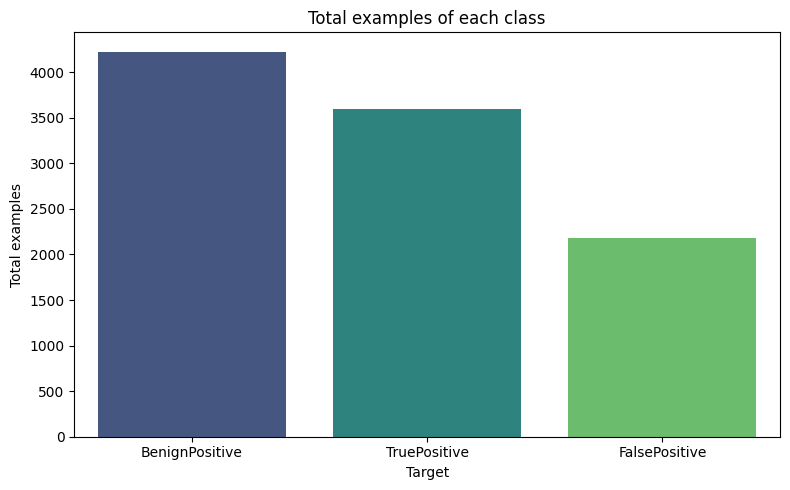

In [12]:
target_counts = df["IncidentGrade"].value_counts().reset_index()
target_counts.columns = ['target', 'count']

plt.figure(figsize=(8, 5))
sns.barplot(x='target', y='count', data=target_counts, hue='target', palette='viridis', legend=False)
plt.title('Total examples of each class')
plt.xlabel('Target')
plt.ylabel('Total examples')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

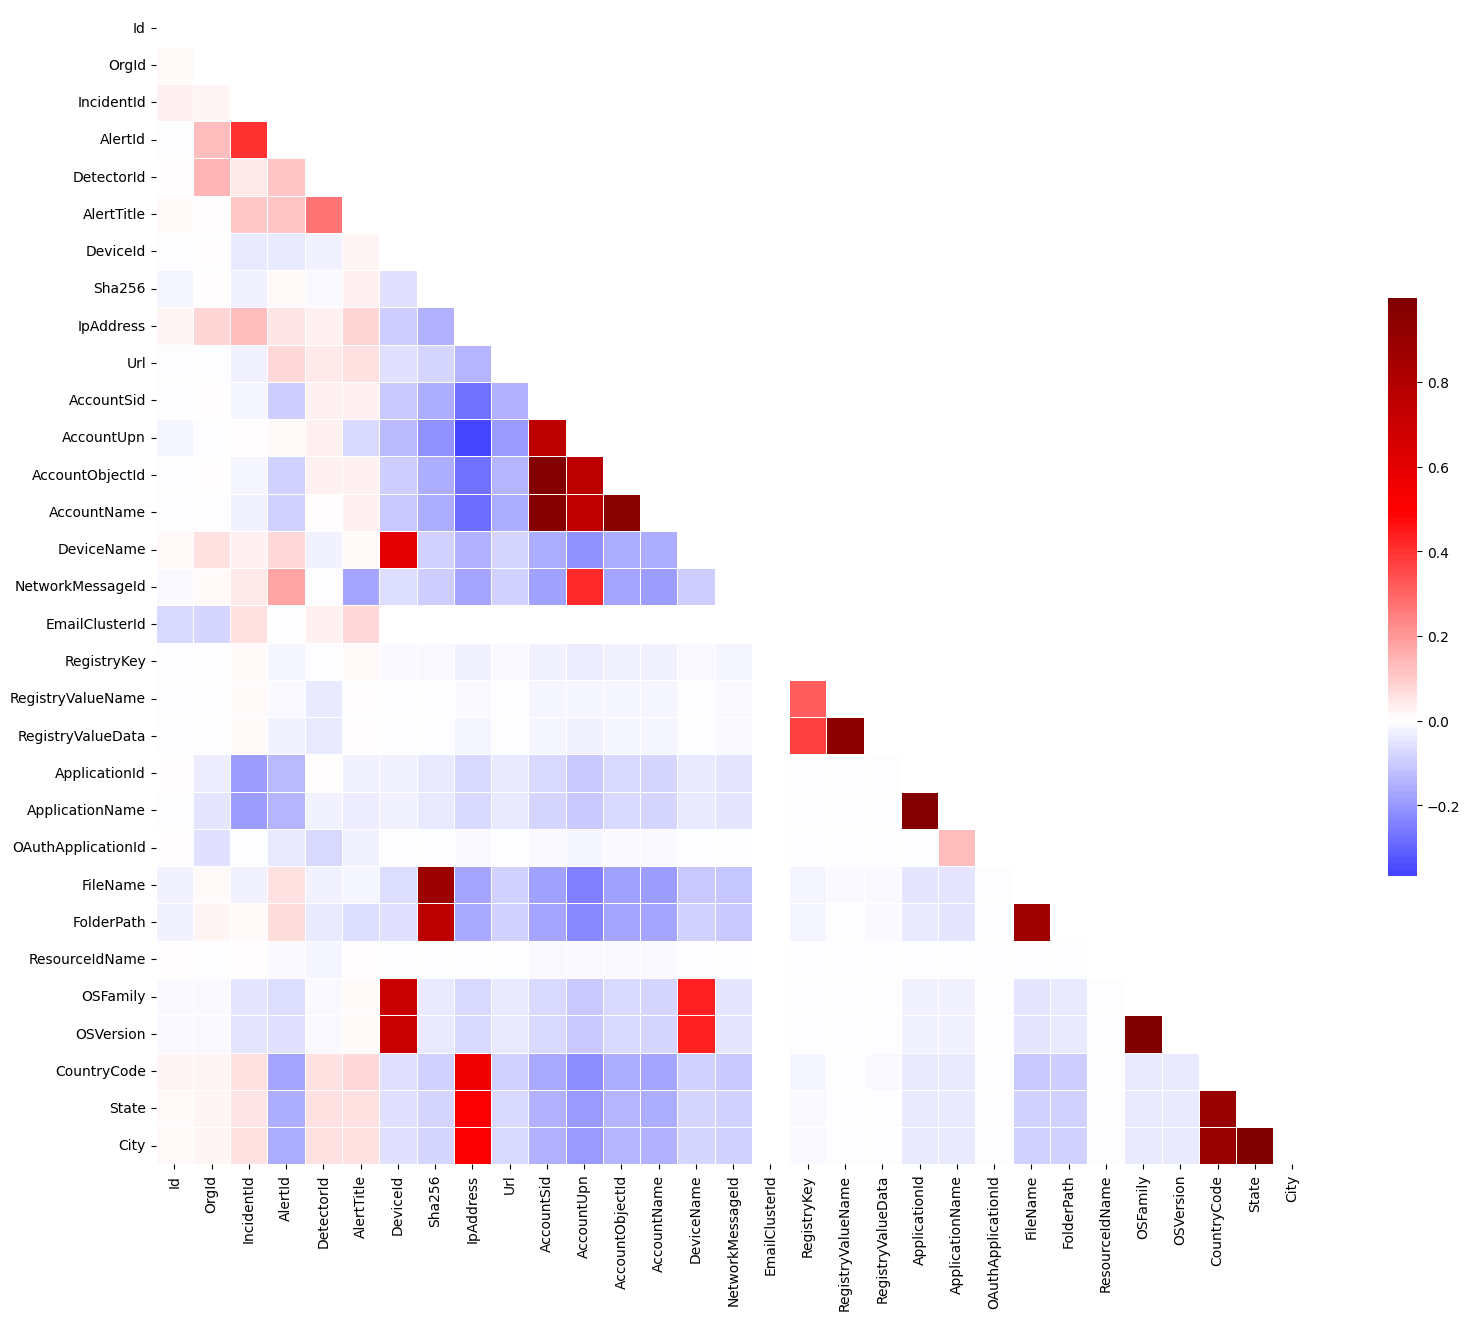

In [13]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(20, 15))
sns.heatmap(corr, mask=mask, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Splitting the Data

In [14]:
y = data['IncidentGrade']
X = data.drop(columns=['IncidentGrade'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

## Data Preprocessing

### Removal of irrelevant features

Our first step is to remove those features that are type of id, particulary we remove;
1. Id (Unique ID for each OrgId–IncidentId pair)
2. OrgId (Organization identifier)
3. IncidentId (Organizationally unique incident identifier)
4. AlertId (Unique identifier for an alert)
5. DetectorId (Unique ID for the alert-generating detector)
6. DeviceId (Unique identifier for the device).
7. AccountUpn (Email account identifier).
8. EmailClusterId (Unique identifier for the email cluster)
9. NetworkMessageId (Org-level identifier for email message)
10. OAuthApplicationId (OAuth application identifier)

We think these are not useful when predicting.

In [15]:
X_train.drop(columns=[
    'Id',
    'OrgId',
    'IncidentId',
    'AlertId',
    'DetectorId',
    'DeviceId',
    'AccountUpn',
    'EmailClusterId',
    'NetworkMessageId',
    'OAuthApplicationId'
], inplace=True)


In [16]:
X_train.nunique()

Timestamp            6588
AlertTitle           1416
Category               17
MitreTechniques       156
ActionGrouped           1
ActionGranular          2
EntityType             18
EvidenceRole            2
Sha256                371
IpAddress            1336
Url                   476
AccountSid           1566
AccountObjectId      1544
AccountName          1644
DeviceName            537
RegistryKey             9
RegistryValueName       6
RegistryValueData       5
ApplicationId          14
ApplicationName        17
ThreatFamily           37
FileName              507
FolderPath            309
ResourceIdName          4
ResourceType            2
Roles                   6
OSFamily                3
OSVersion               6
AntispamDirection       2
SuspicionLevel          1
LastVerdict             3
CountryCode            59
State                 120
City                  157
Usage                   2
dtype: int64

In [17]:
X_train.columns

Index(['Timestamp', 'AlertTitle', 'Category', 'MitreTechniques',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountObjectId',
       'AccountName', 'DeviceName', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName', 'ThreatFamily',
       'FileName', 'FolderPath', 'ResourceIdName', 'ResourceType', 'Roles',
       'OSFamily', 'OSVersion', 'AntispamDirection', 'SuspicionLevel',
       'LastVerdict', 'CountryCode', 'State', 'City', 'Usage'],
      dtype='object')

Let's now explore the null values.

In [18]:
columns_with_missing = X_train.columns[X_train.isnull().any()]

for column in columns_with_missing:
    num_missing = X_train[column].isnull().sum()
    print(f"{column}: {X_train[column].dtype}, Missing values = {num_missing}")

MitreTechniques: object, Missing values = 3791
ActionGrouped: object, Missing values = 6998
ActionGranular: object, Missing values = 6998
ThreatFamily: object, Missing values = 6958
ResourceType: object, Missing values = 6997
Roles: object, Missing values = 6799
AntispamDirection: object, Missing values = 6864
SuspicionLevel: object, Missing values = 5898
LastVerdict: object, Missing values = 5304


Vemos que todos los valores faltantes son categoricas.

Let's analize if we can do imputation over the missing values for each features where are missing

### Simple Methodology for Handling Missing Values:

1. **Remove of columns with missing values > 90%**:
   - If a column more than 80, we have decided to remove it, we also consider the previsualization and display of numbers of that column in Kaggle. This is simple and prevents the complexity of imputing values.

2. **Imputation with the mode or mean**:
   - For columns with a small number of missing values, the simplest approach is to replace the missing values with the mode (for categorical variables) or the mean (for numerical variables). This ensures that data is not lost while keeping things simple.

This methodology is effective in many cases and avoids complexity, although it may not be ideal for all situations, especially when missing data is not missing at random.


Before removing, let's analyze if there is a pattern between the two features with missing values.

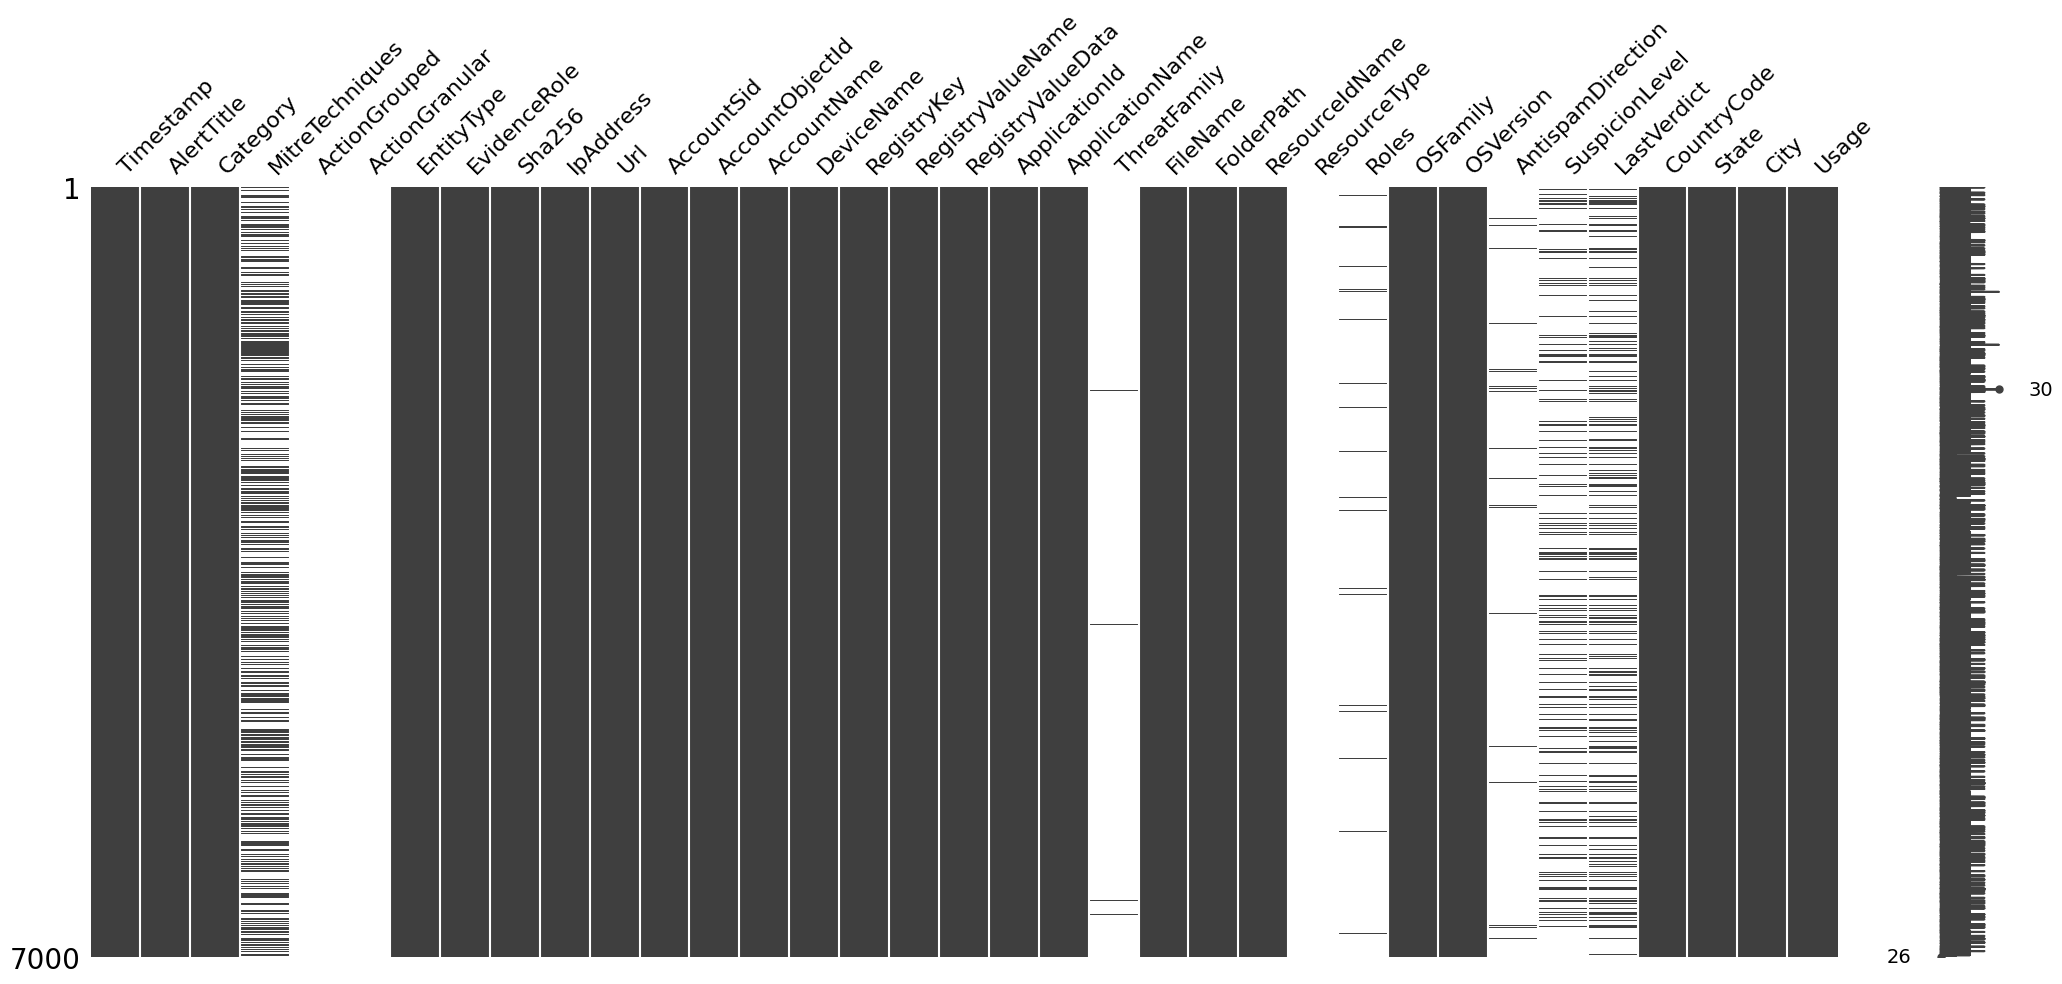

In [19]:
import missingno as msno
msno.matrix(X_train);

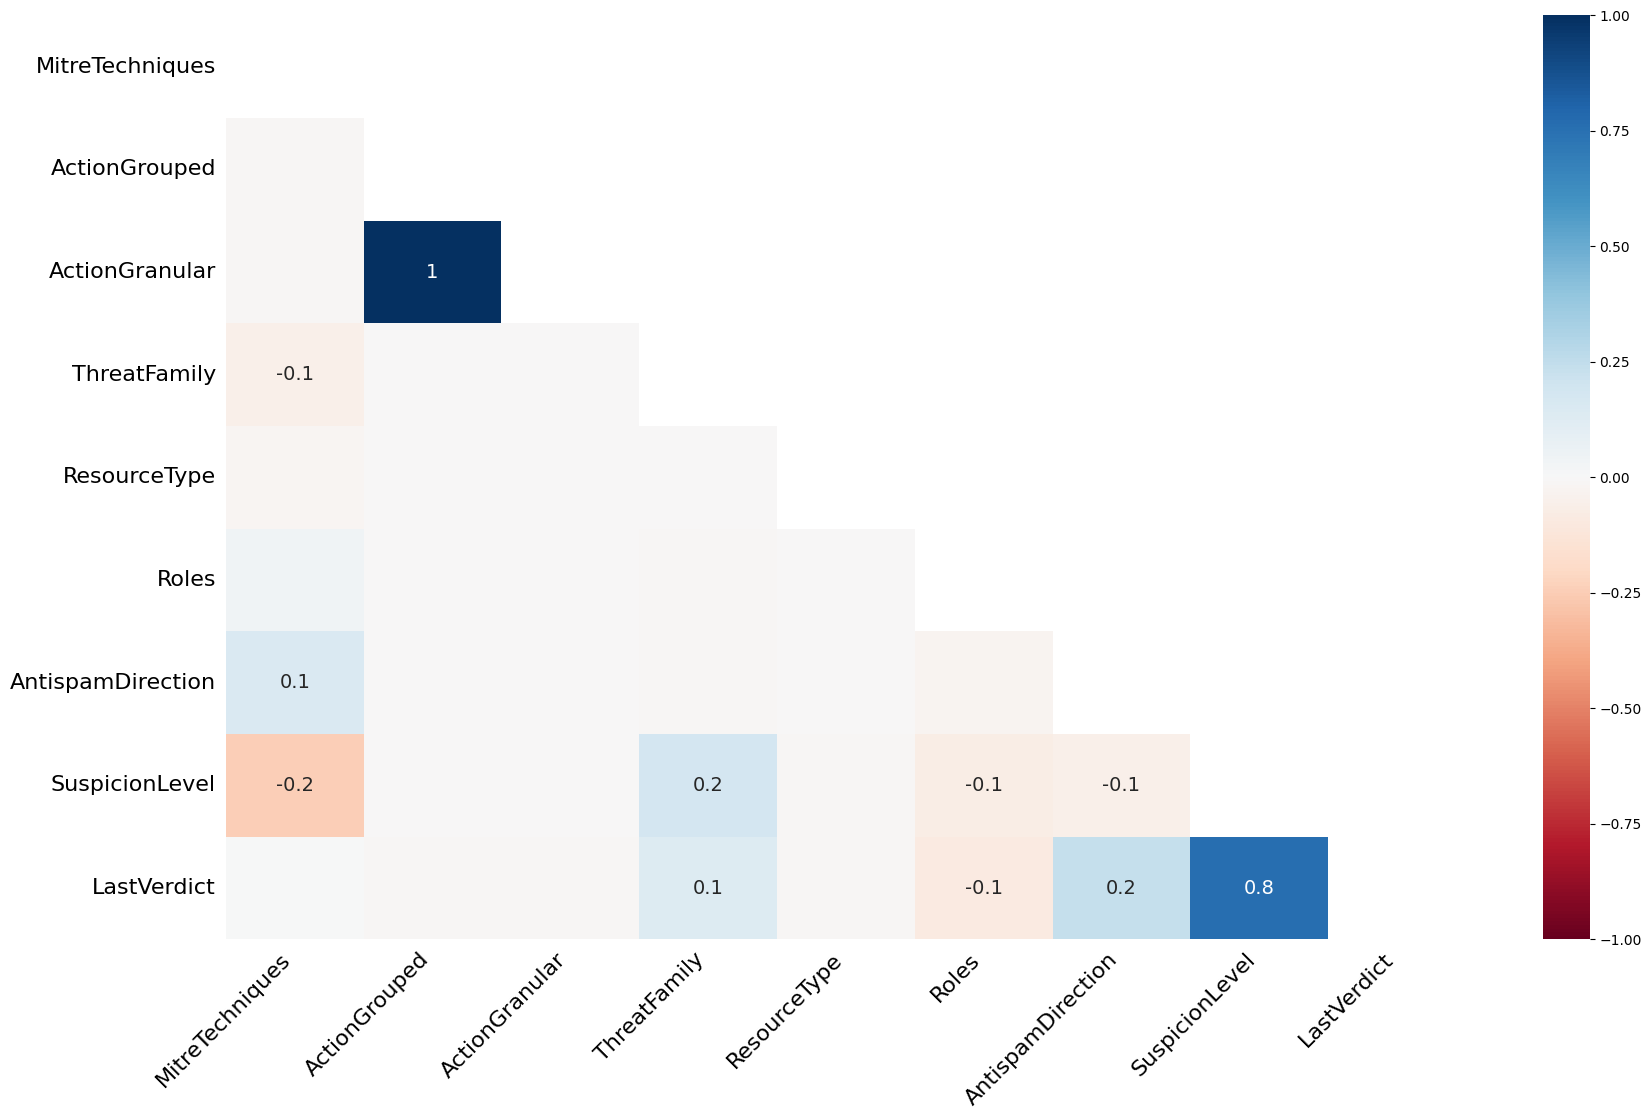

In [20]:
import missingno as msno
msno.heatmap(X_train);

The first observation is that "LastVerdict" is correlated with "SuspicionLevel." AQUI HEMOS DE HACER ALGO

### Removing features
Now we are going to proceed to remove those features that has more then 90% of missing values.

In [21]:
missing_percentages = X_train.isnull().mean() * 100
columns_to_drop = missing_percentages[missing_percentages > 90].index
print("Columns with more than 90% missing values:")
for column in columns_to_drop:
    print(f"{column}: {missing_percentages[column]:.2f}% missing")
X_train = X_train.drop(columns=columns_to_drop)
print(f"\nNumber of columns removed: {len(columns_to_drop)}")


Columns with more than 90% missing values:
ActionGrouped: 99.97% missing
ActionGranular: 99.97% missing
ThreatFamily: 99.40% missing
ResourceType: 99.96% missing
Roles: 97.13% missing
AntispamDirection: 98.06% missing

Number of columns removed: 6


In [22]:
X_train.isnull().sum()

Timestamp               0
AlertTitle              0
Category                0
MitreTechniques      3791
EntityType              0
EvidenceRole            0
Sha256                  0
IpAddress               0
Url                     0
AccountSid              0
AccountObjectId         0
AccountName             0
DeviceName              0
RegistryKey             0
RegistryValueName       0
RegistryValueData       0
ApplicationId           0
ApplicationName         0
FileName                0
FolderPath              0
ResourceIdName          0
OSFamily                0
OSVersion               0
SuspicionLevel       5898
LastVerdict          5304
CountryCode             0
State                   0
City                    0
Usage                   0
dtype: int64

### Removing SuspicionLevel and LastVerdict

We observed that both SuspicionLevel and LastVerdict have over 70% missing values. Additionally, the correlation matrix shows an 80% correlation between these two variables. Upon further inspection using the missingness matrix (e.g., missingno), we noticed an almost one-to-one relationship between the missing values in these columns.

This suggests that if SuspicionLevel has a value, it is highly likely that LastVerdict also has a value, and vice versa. Conversely, when one of these variables has a missing value, the other is also likely to have a missing value. Due to this strong dependency, it is difficult to impute the missing values in a reliable way. Therefore, we decided to remove these columns from our dataset to avoid introducing noise or bias into our analysis.

In [23]:
X_train.drop(columns=[
    'SuspicionLevel',
    'LastVerdict'
    
], inplace=True)

In [24]:
X_train

,Timestamp,AlertTitle,Category,MitreTechniques,EntityType,EvidenceRole,Sha256,IpAddress,Url,AccountSid,...,ApplicationName,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Usage
9197,2024-06-05T22:10:02.000Z,3,InitialAccess,NaN,Ip,Related,138268,5041,160396,441377,...,3421,289573,117668,3586,5,66,5,1445,10630,Public
609,2024-06-13T05:23:37.000Z,1823,SuspiciousActivity,NaN,Ip,Related,138268,41103,160396,441377,...,3421,289573,117668,3586,5,66,242,1445,10630,Public
7695,2024-05-23T05:36:48.000Z,20,Impact,NaN,Ip,Related,138268,4288,160396,441377,...,3421,289573,117668,3586,5,66,242,1445,10630,Private
1022,2024-06-10T22:40:06.000Z,280,Discovery,T1007;T1059.001,Process,Related,69,360606,160396,441377,...,3421,65,62,3586,5,66,242,1445,10630,Private
2277,2024-06-08T21:52:37.000Z,197,CommandAndControl,T1046;T1030;T1071;T1071.001,Ip,Related,138268,34667,160396,441377,...,3421,289573,117668,3586,5,66,242,1445,10630,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,2024-06-06T17:37:51.000Z,14,Exfiltration,NaN,MailMessage,Impacted,138268,360606,160396,441377,...,3421,289573,117668,3586,5,66,242,1445,10630,Public
1834,2024-06-13T20:37:44.000Z,33573,Exfiltration,NaN,MailMessage,Impacted,138268,360606,160396,441377,...,3421,289573,117668,3586,5,66,242,1445,10630,Public
5217,2024-06-06T20:05:32.000Z,0,InitialAccess,T1078;T1078.004,CloudLogonRequest,Related,138268,360606,160396,441377,...,3421,289573,117668,3586,5,66,242,1445,10630,Public
5270,2024-06-08T19:25:11.000Z,21,SuspiciousActivity,NaN,User,Impacted,138268,360606,160396,2166,...,3421,289573,117668,3586,5,66,242,1445,10630,Private


### Transforming Categorical Values

In [25]:
print(X_train.shape)
df_encoded = pd.get_dummies(X_train, drop_first=True)
df_encoded.shape

(7000, 27)


(7000, 6798)

### Why One-Hot Encoding May Not Be Ideal

One-Hot Encoding can drastically increase the number of features in the dataset. In this case, applying it to categorical columns with many unique values causes the dataset to expand from 31 columns to 6819. This can lead to several issues:

1. **Increased Dimensionality**: A massive increase in columns can cause higher computational cost, longer training times, and make models harder to interpret.

As an alternative, **Label Encoding** is more efficient, reducing the dimensionality while still transforming categorical variables into numeric values.


In [26]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = X_train.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in categorical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])

X_train.shape

(7000, 27)

This visualization shows that the column MitreTechniques has a low correlation with the objective variable. Additionally, more than 50% of its values are missing. Based on these observations, we decided to remove this column as it is unlikely to provide significant value to the predictive model

In [27]:
X_train.drop(columns=[
    'MitreTechniques'
    
], inplace=True)

In [28]:
X_train.dtypes

Timestamp            int64
AlertTitle           int64
Category             int64
EntityType           int64
EvidenceRole         int64
Sha256               int64
IpAddress            int64
Url                  int64
AccountSid           int64
AccountObjectId      int64
AccountName          int64
DeviceName           int64
RegistryKey          int64
RegistryValueName    int64
RegistryValueData    int64
ApplicationId        int64
ApplicationName      int64
FileName             int64
FolderPath           int64
ResourceIdName       int64
OSFamily             int64
OSVersion            int64
CountryCode          int64
State                int64
City                 int64
Usage                int64
dtype: object

### Extreme Values

Upon analyzing the distribution of some numerical and categorical features in the dataset (hosted on Kaggle), we identified several columns with extreme or outlier values. These features include:

1. **ApplicationName**  
2. **FileName**  
3. **FolderPath**  
4. **OSFamily**  
5. **OSVersion**  
6. **CountryCode**  
7. **State**  
8. **City**  
9. **DeviceName**  
10. **AccountName**  
11. **AccountSID**  
12. **URL**  
13. **IPAddress**  
14. **SHA256**

These extreme values may represent rare or exceptional cases that could skew the analysis or model training. We plan to investigate these columns further to determine how to handle these outliers appropriately—whether by normalization, transformation, or removal—depending on their relevance and impact on the model.

In [29]:
columns = [
    "ApplicationName", "FileName", "FolderPath", "OSFamily", "OSVersion", 
    "CountryCode", "State", "City", "DeviceName", "AccountName", 
    "AccountSID", "URL", "IPAddress", "SHA256"
]

outliers_info = {}

for col in columns:
    if col in X_train.select_dtypes(include=['number']).columns: 
        Q1 = X_train[col].quantile(0.25)
        Q3 = X_train[col].quantile(0.75)
        IQR = Q3 - Q1

        small_outliers = X_train[col] < (Q1 - 1.5 * IQR)
        big_outliers = X_train[col] > (Q3 + 1.5 * IQR)

        outliers_info[col] = {
            "Q1": Q1,
            "Q3": Q3,
            "IQR": IQR,
            "small_outliers": sum(small_outliers),
            "big_outliers": sum(big_outliers),
            "outlier_values": X_train[col][small_outliers | big_outliers].head().tolist()
        }

outliers_info


{'ApplicationName': {'Q1': np.float64(3421.0),
  'Q3': np.float64(3421.0),
  'IQR': np.float64(0.0),
  'small_outliers': 146,
  'big_outliers': 0,
  'outlier_values': [4, 3, 4, 22, 4]},
 'FileName': {'Q1': np.float64(289573.0),
  'Q3': np.float64(289573.0),
  'IQR': np.float64(0.0),
  'small_outliers': 748,
  'big_outliers': 0,
  'outlier_values': [65, 2183, 148993, 48633, 3283]},
 'FolderPath': {'Q1': np.float64(117668.0),
  'Q3': np.float64(117668.0),
  'IQR': np.float64(0.0),
  'small_outliers': 629,
  'big_outliers': 0,
  'outlier_values': [62, 0, 0, 2, 1]},
 'OSFamily': {'Q1': np.float64(5.0),
  'Q3': np.float64(5.0),
  'IQR': np.float64(0.0),
  'small_outliers': 136,
  'big_outliers': 0,
  'outlier_values': [0, 0, 0, 0, 0]},
 'OSVersion': {'Q1': np.float64(66.0),
  'Q3': np.float64(66.0),
  'IQR': np.float64(0.0),
  'small_outliers': 136,
  'big_outliers': 0,
  'outlier_values': [0, 0, 0, 0, 0]},
 'CountryCode': {'Q1': np.float64(242.0),
  'Q3': np.float64(242.0),
  'IQR': np.flo

## Normalization

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns,index=X_train.index)

### Same Preprocessing on the X_test

To ensure consistency, we will apply the same preprocessing steps used on `X_train` to `X_test`. This includes:

1. **Handling Missing Values**:
   - Imputation or removal based on the decisions and parameters from `X_train`.

2. **Outlier Detection**:
   - Using the IQR thresholds calculated from `X_train` to identify and handle outliers in `X_test`.

3. **Feature Transformations**:
   - Applying the same scaling, encoding, and transformations as in `X_train`.

4. **Column Removal**:
   - Dropping columns removed in `X_train` to maintain uniformity.

This ensures consistent data preparation for model evaluation.


In [31]:
X_test.drop(columns=[
    'Id',
    'OrgId',
    'IncidentId',
    'AlertId',
    'DetectorId',
    'DeviceId',
    'AccountUpn',
    'EmailClusterId',
    'NetworkMessageId',
    'OAuthApplicationId'
], inplace=True)




In [32]:
columns_with_missing = X_test.columns[X_test.isnull().any()]

for column in columns_with_missing:
    num_missing = X_test[column].isnull().sum()
    print(f"{column}: {X_test[column].dtype}, Missing values = {num_missing}")

MitreTechniques: object, Missing values = 1675
ActionGrouped: object, Missing values = 2999
ActionGranular: object, Missing values = 2999
ThreatFamily: object, Missing values = 2979
ResourceType: object, Missing values = 3000
Roles: object, Missing values = 2921
AntispamDirection: object, Missing values = 2961
SuspicionLevel: object, Missing values = 2531
LastVerdict: object, Missing values = 2298


In [33]:
missing_percentages = X_test.isnull().mean() * 100
columns_to_drop = missing_percentages[missing_percentages > 90].index
print("Columns with more than 90% missing values:")
for column in columns_to_drop:
    print(f"{column}: {missing_percentages[column]:.2f}% missing")
X_test = X_test.drop(columns=columns_to_drop)
print(f"\nNumber of columns removed: {len(columns_to_drop)}")


Columns with more than 90% missing values:
ActionGrouped: 99.97% missing
ActionGranular: 99.97% missing
ThreatFamily: 99.30% missing
ResourceType: 100.00% missing
Roles: 97.37% missing
AntispamDirection: 98.70% missing

Number of columns removed: 6


In [34]:
X_test.drop(columns=[
    'SuspicionLevel',
    'LastVerdict'
    
], inplace=True)

In [35]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = X_test.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in categorical_cols:
    X_test[col] = label_encoder.fit_transform(X_test[col])

X_test.shape

(3000, 27)

In [36]:
X_test.drop(columns=[
    'MitreTechniques'
    
], inplace=True)

In [37]:
columns = [
    "ApplicationName", "FileName", "FolderPath", "OSFamily", "OSVersion", 
    "CountryCode", "State", "City", "DeviceName", "AccountName", 
    "AccountSID", "URL", "IPAddress", "SHA256"
]

outliers_info = {}

for col in columns:
    if col in X_test.select_dtypes(include=['number']).columns: 
        Q1 = X_test[col].quantile(0.25)
        Q3 = X_test[col].quantile(0.75)
        IQR = Q3 - Q1

        small_outliers = X_test[col] < (Q1 - 1.5 * IQR)
        big_outliers = X_test[col] > (Q3 + 1.5 * IQR)

        outliers_info[col] = {
            "Q1": Q1,
            "Q3": Q3,
            "IQR": IQR,
            "small_outliers": sum(small_outliers),
            "big_outliers": sum(big_outliers),
            "outlier_values": X_test[col][small_outliers | big_outliers].head().tolist()
        }

outliers_info


{'ApplicationName': {'Q1': np.float64(3421.0),
  'Q3': np.float64(3421.0),
  'IQR': np.float64(0.0),
  'small_outliers': 64,
  'big_outliers': 0,
  'outlier_values': [0, 0, 0, 0, 6]},
 'FileName': {'Q1': np.float64(289573.0),
  'Q3': np.float64(289573.0),
  'IQR': np.float64(0.0),
  'small_outliers': 365,
  'big_outliers': 0,
  'outlier_values': [388, 88242, 555, 211581, 3]},
 'FolderPath': {'Q1': np.float64(117668.0),
  'Q3': np.float64(117668.0),
  'IQR': np.float64(0.0),
  'small_outliers': 309,
  'big_outliers': 0,
  'outlier_values': [98404, 58389, 1110, 0, 6]},
 'OSFamily': {'Q1': np.float64(5.0),
  'Q3': np.float64(5.0),
  'IQR': np.float64(0.0),
  'small_outliers': 65,
  'big_outliers': 0,
  'outlier_values': [0, 0, 0, 0, 0]},
 'OSVersion': {'Q1': np.float64(66.0),
  'Q3': np.float64(66.0),
  'IQR': np.float64(0.0),
  'small_outliers': 65,
  'big_outliers': 0,
  'outlier_values': [0, 0, 0, 0, 0]},
 'CountryCode': {'Q1': np.float64(242.0),
  'Q3': np.float64(242.0),
  'IQR': np.

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns,index=X_test.index)

## Saving Data for The Model Evaluation

In [39]:
import os

folder_path = './data'  

os.makedirs(folder_path, exist_ok=True)

X_train.to_csv(os.path.join(folder_path, 'X_train.csv'), index=False)
X_test.to_csv(os.path.join(folder_path, 'X_test.csv'), index=False)
y_train.to_csv(os.path.join(folder_path, 'y_train.csv'), index=False)
y_test.to_csv(os.path.join(folder_path, 'y_test.csv'), index=False)

print("Files saved successfully!")


Files saved successfully!
